In [1]:
#import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
finan_data = pd.read_excel('C:/Users/MACHIRA/clustering/data/finaccess.xls', sheet_name='Sheet1')
finan_data.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Light_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0,6,0,49,2,3,0,0,2,2,...,3.0,7,4,1,0,0,0,0,0,5
1,0,7,0,43,2,3,1,0,0,2,...,0.0,7,3,0,0,0,0,0,0,1
2,0,5,0,55,1,3,0,0,0,2,...,3.0,7,4,1,0,1,1,0,1,0
3,0,12,1,55,0,3,0,0,0,0,...,2.0,1,4,1,1,1,0,1,1,0
4,0,4,0,63,0,3,7,0,0,0,...,3.0,7,0,0,0,0,0,0,0,1


In [3]:
#checking the number of rows and columns
finan_data.shape

(8669, 72)

In [4]:
#statistical Overview
finan_data.describe()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Light_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
count,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,...,8668.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000
mean,0.416542,3.974276,0.577460,39.293690,2.493136,2.025955,3.050179,0.040028,0.316530,0.855116,...,1.976350,4.134964,2.951898,0.533049,0.561656,0.523474,0.578383,0.714154,0.579306,1.112008
std,0.493014,2.321904,0.493992,17.103637,2.015023,1.291463,3.168386,0.258477,0.695878,0.966085,...,1.140633,3.173460,1.435385,0.498935,0.496213,0.499477,0.493846,0.451843,0.519212,1.532235
min,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,1.000000,35.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,5.000000,1.000000,50.000000,4.000000,3.000000,7.000000,0.000000,0.000000,2.000000,...,3.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,1.000000,21.000000,1.000000,95.000000,10.000000,10.000000,11.000000,2.000000,2.000000,2.000000,...,10.000000,11.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000


In [5]:
#data types
print(finan_data.dtypes)

Residence         int64
Household Size    int64
Resp              int64
Age               int64
Education         int64
                  ...  
Banana            int64
Towels            int64
Flask             int64
Own_Land          int64
House_0ship       int64
Length: 72, dtype: object


In [6]:
#finding null value
print(finan_data.isna().sum())

Residence         0
Household Size    0
Resp              0
Age               0
Education         0
                 ..
Banana            0
Towels            0
Flask             0
Own_Land          0
House_0ship       0
Length: 72, dtype: int64


In [7]:
#Displaying all the columns and their data types
finan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Residence       8669 non-null   int64  
 1   Household Size  8669 non-null   int64  
 2   Resp            8669 non-null   int64  
 3   Age             8669 non-null   int64  
 4   Education       8669 non-null   int64  
 5   Marital         8669 non-null   int64  
 6   Income          8669 non-null   int64  
 7   Save_Micro      8669 non-null   int64  
 8   Sav_Mobank      8669 non-null   int64  
 9   Sav_Mob         8669 non-null   int64  
 10  Sav_Coop        8669 non-null   int64  
 11  Save_Chama      8669 non-null   int64  
 12  Sav_Friends     8669 non-null   int64  
 13  Sav_FamKeep     8669 non-null   int64  
 14  Sav_Secret      8669 non-null   int64  
 15  Mob_M1y         8669 non-null   int64  
 16  Mob_Bank        8669 non-null   int64  
 17  Loan_Bank       8669 non-null   i

In [8]:
#Trying to find value count and identify the object outputed above
finan_data['Light_Type'].value_counts()

1.0     3737
3.0     2138
2.0     1849
4.0      667
0.0      180
5.0       42
7.0       19
6.0       14
8.0       14
9.0        5
10.0       3
Name: Light_Type, dtype: int64

In [9]:
#Locating the missing value
finan_data['Light_Type'].loc[156:160]

156    2.0
157    3.0
158    NaN
159    1.0
160    1.0
Name: Light_Type, dtype: float64

In [10]:
#verifying indeed is a missing value
finan_data['Light_Type'].isna().sum()

1

In [11]:
#filling the missing value with mode(Most repeat value)
finan_data['Light_Type'].fillna(finan_data['Light_Type'].mode()[0], inplace=True)
finan_data['Light_Type'].isna().sum()

0

In [12]:
finan_data['Light_Type'].loc[156:160]

156    2.0
157    3.0
158    1.0
159    1.0
160    1.0
Name: Light_Type, dtype: float64

<AxesSubplot:>

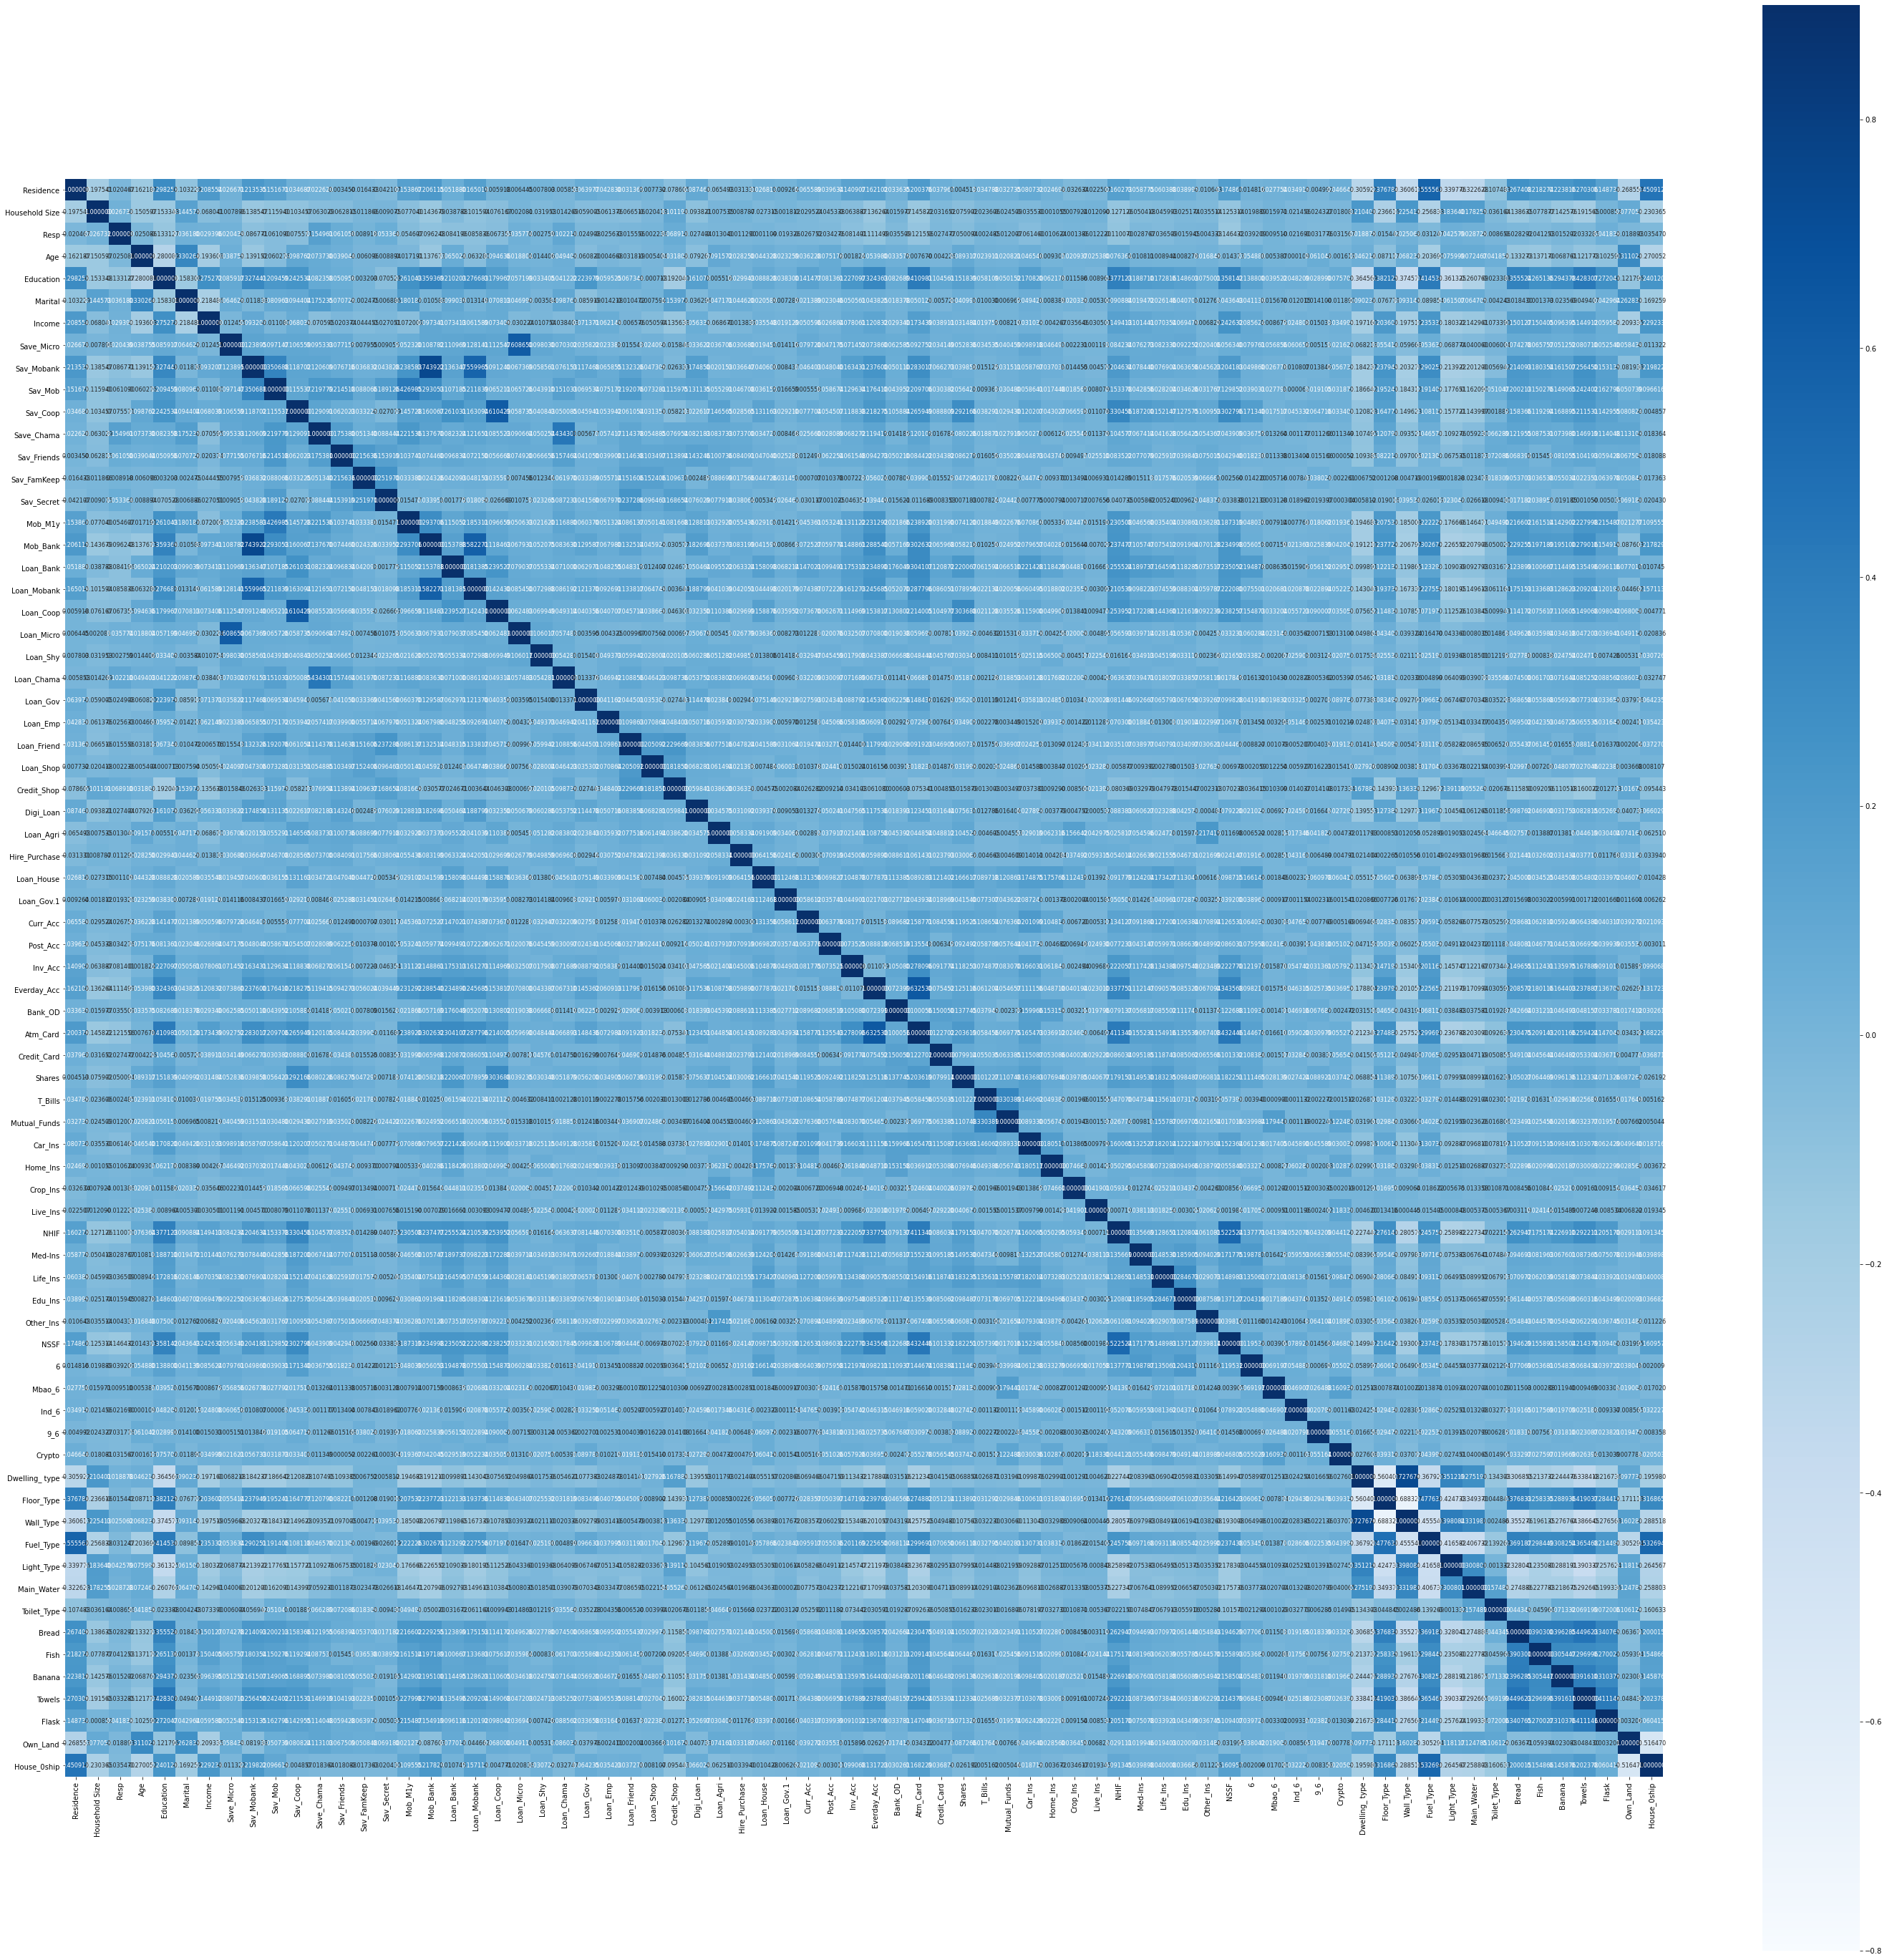

In [13]:
#visualizing the correlation between the features
correlation = finan_data.corr()
plt.figure(figsize=(50,50))
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt='1f', vmin=-0.8, vmax=0.9, annot_kws={'size':8}, cmap='Blues')

In [14]:
#let's normalize the data to avoid biasness 
from sklearn.preprocessing import normalize
dt_scaled = normalize(finan_data)

In [15]:
dt_scaled = pd.DataFrame(dt_scaled, columns=finan_data.columns)
dt_scaled.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Light_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0.0,0.118125,0.000000,0.964687,0.039375,0.059062,0.000000,0.0,0.039375,0.039375,...,0.059062,0.137812,0.078750,0.019687,0.000000,0.000000,0.000000,0.000000,0.000000,0.098437
1,0.0,0.156682,0.000000,0.962472,0.044766,0.067149,0.022383,0.0,0.000000,0.044766,...,0.000000,0.156682,0.067149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022383
2,0.0,0.088960,0.000000,0.978561,0.017792,0.053376,0.000000,0.0,0.000000,0.035584,...,0.053376,0.124544,0.071168,0.017792,0.000000,0.017792,0.017792,0.000000,0.017792,0.000000
3,0.0,0.210494,0.017541,0.964764,0.000000,0.052623,0.000000,0.0,0.000000,0.000000,...,0.035082,0.017541,0.070165,0.017541,0.017541,0.017541,0.000000,0.017541,0.017541,0.000000
4,0.0,0.062416,0.000000,0.983056,0.000000,0.046812,0.109228,0.0,0.000000,0.000000,...,0.046812,0.109228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015604


### Hierarchical Agglomerative Clustering

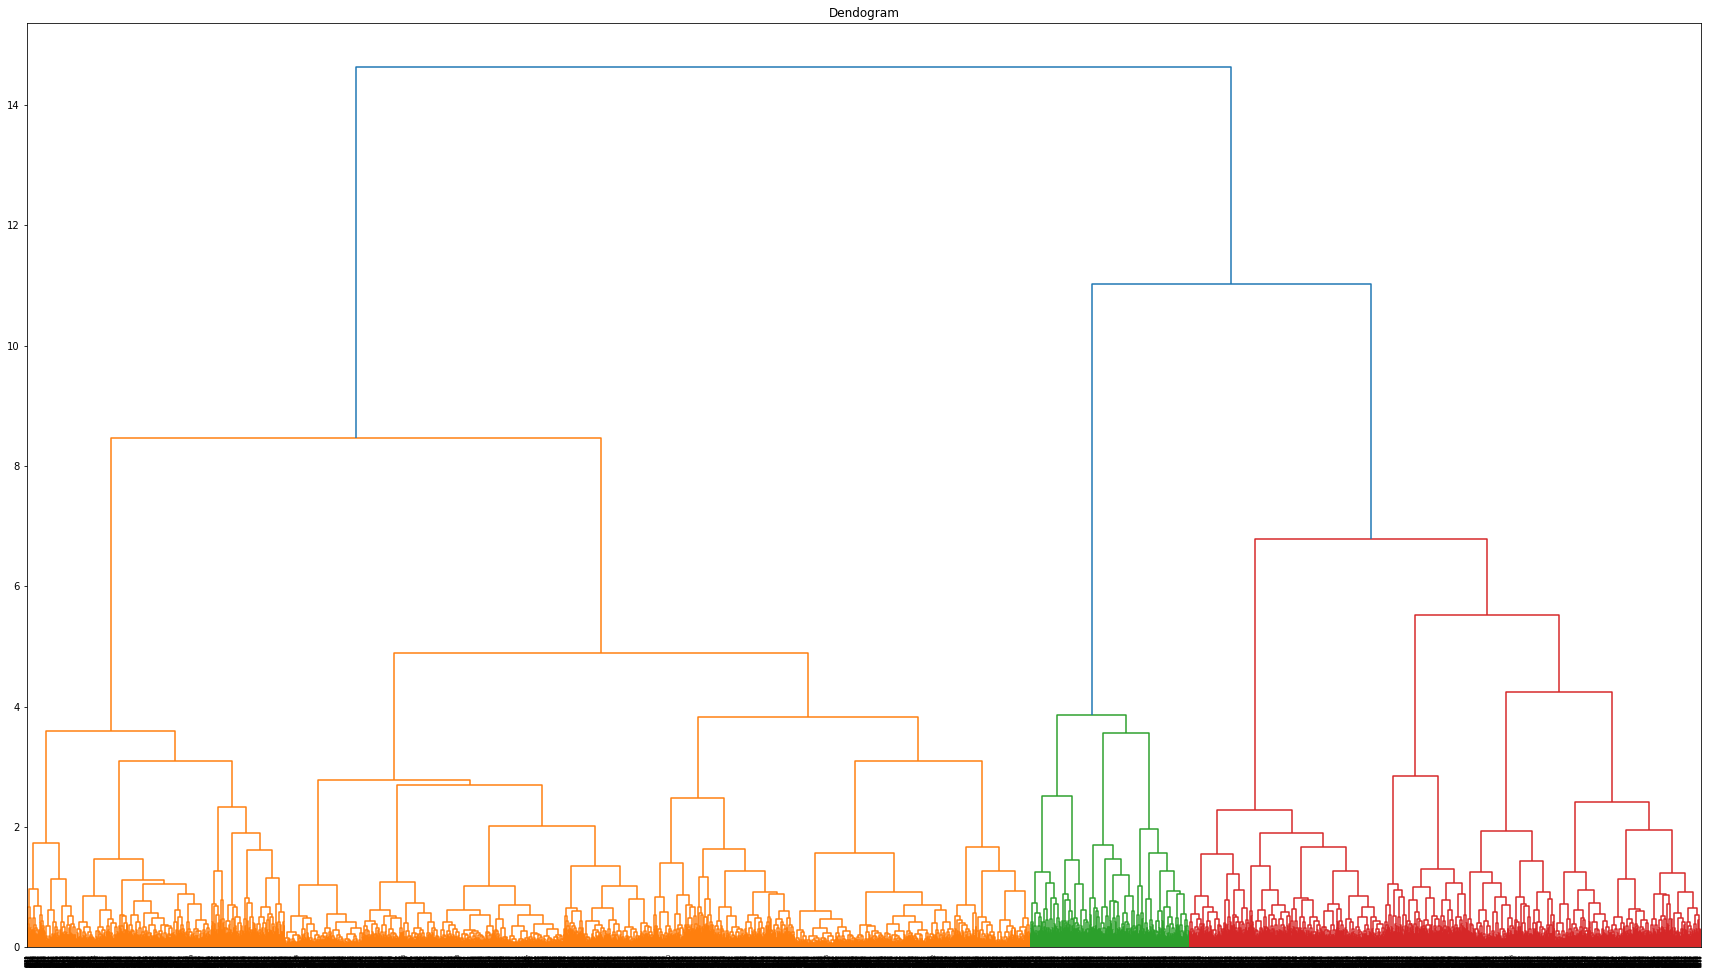

In [16]:
#let's create a dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,17))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(dt_scaled, method='ward'))

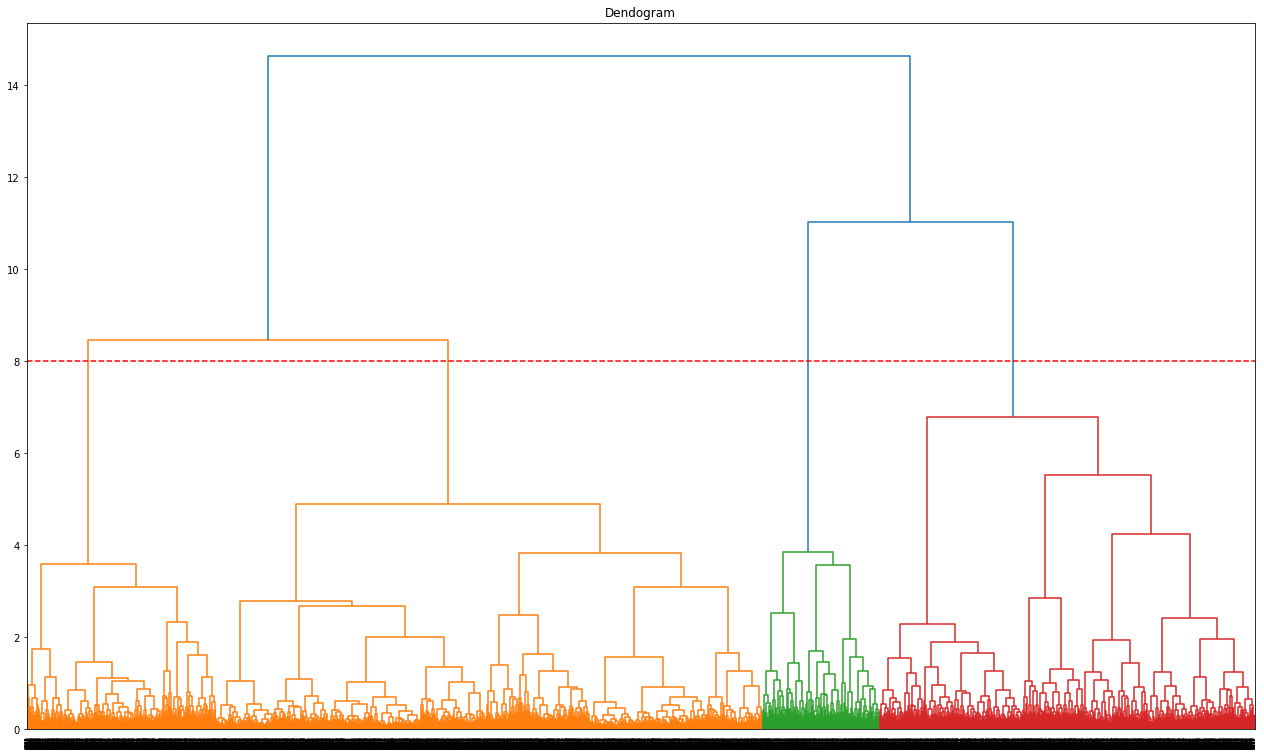

In [17]:
plt.figure(figsize=(22,13))
plt.title("Dendogram")
sc = shc.linkage(dt_scaled, method='ward')
dend = shc.dendrogram(sc)
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')

In [19]:
cluster.fit_predict(dt_scaled)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [20]:
cluster.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

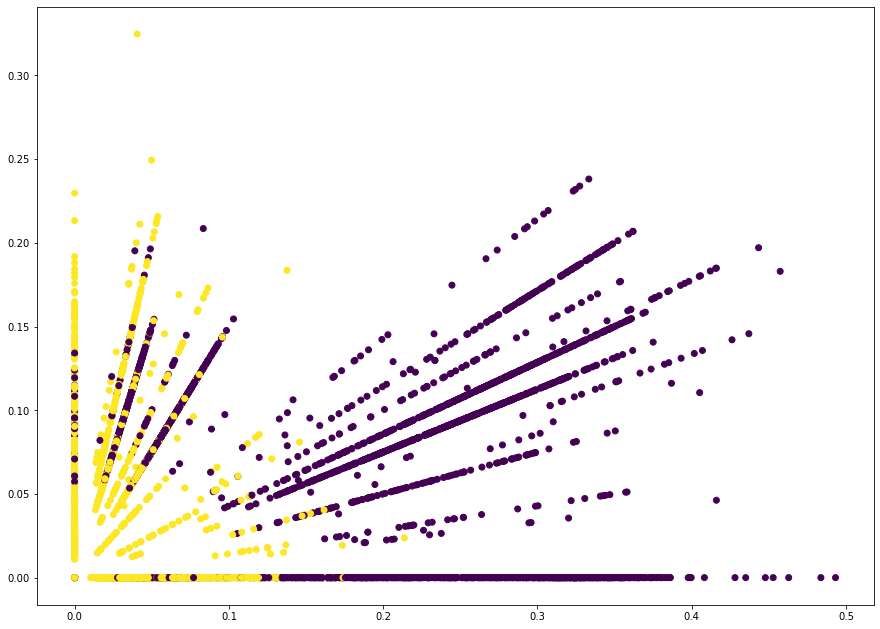

In [21]:
plt.figure(figsize=(15,11))
plt.scatter(dt_scaled['Income'], dt_scaled['House_0ship'], c=cluster.labels_)

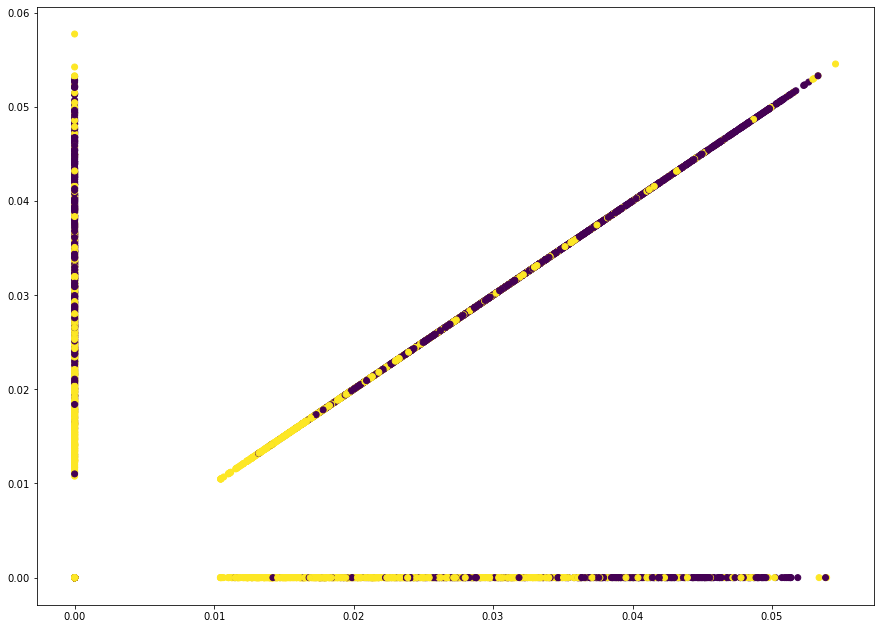

In [23]:
plt.figure(figsize=(15,11))
plt.scatter(dt_scaled['Banana'], dt_scaled['Bread'], c=cluster.labels_)

### K-Means Clustering

In [24]:
#import K mean
from sklearn.cluster import KMeans

In [25]:
#let's create a kmeans object
kmean = KMeans(n_clusters=4)

In [35]:
#lets fit the our data
Kmodel = kmean.fit(dt_scaled)
Kmodel

KMeans(n_clusters=4)

In [36]:
Kmodel.labels_

array([2, 0, 2, ..., 3, 2, 3])

In [37]:
Kmodel.cluster_centers_

array([[ 6.68131889e-03,  1.59426070e-01,  1.95734431e-02,
         9.26154562e-01,  5.96483173e-02,  6.75912085e-02,
         3.42872921e-02,  8.70534362e-04,  5.65201899e-03,
         2.40092814e-02,  3.14220759e-03,  1.71565620e-02,
         5.35112389e-03,  3.93842422e-03,  1.77229792e-02,
         4.60554906e-02,  8.56792412e-03,  1.00337887e-03,
         2.67525641e-03,  9.96967457e-04,  8.41346912e-04,
         2.28404298e-04,  5.87485772e-03,  4.61585902e-04,
         6.38915571e-04,  7.14075113e-03,  2.03410595e-03,
         2.85649011e-02,  3.51165225e-03,  5.18909844e-04,
         5.07799851e-04,  7.56118546e-05,  5.11058830e-05,
         2.59759079e-04,  3.25620393e-04,  1.46504978e-03,
         5.37790214e-03,  7.45388994e-19,  4.43895723e-03,
         7.14385990e-05,  6.02599338e-04,  1.93875925e-05,
         1.42301535e-19,  1.92489602e-04,  2.61520504e-05,
         1.65755733e-04,  1.01773456e-04,  7.54781051e-03,
         2.34890463e-04,  2.22261445e-18,  4.19418111e-0

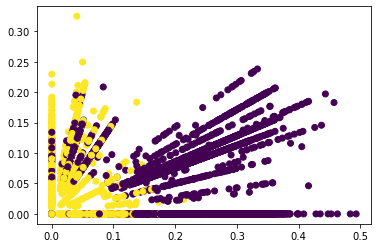

In [39]:
plt.scatter(dt_scaled['Income'], dt_scaled['House_0ship'], c=cluster.labels_)